In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading dataset
df=pd.read_excel('C:\\Users\\91735\\Downloads\\iris (1).xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

# preprocessing

In [4]:
df.dtypes #checking the datatypes of columns

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

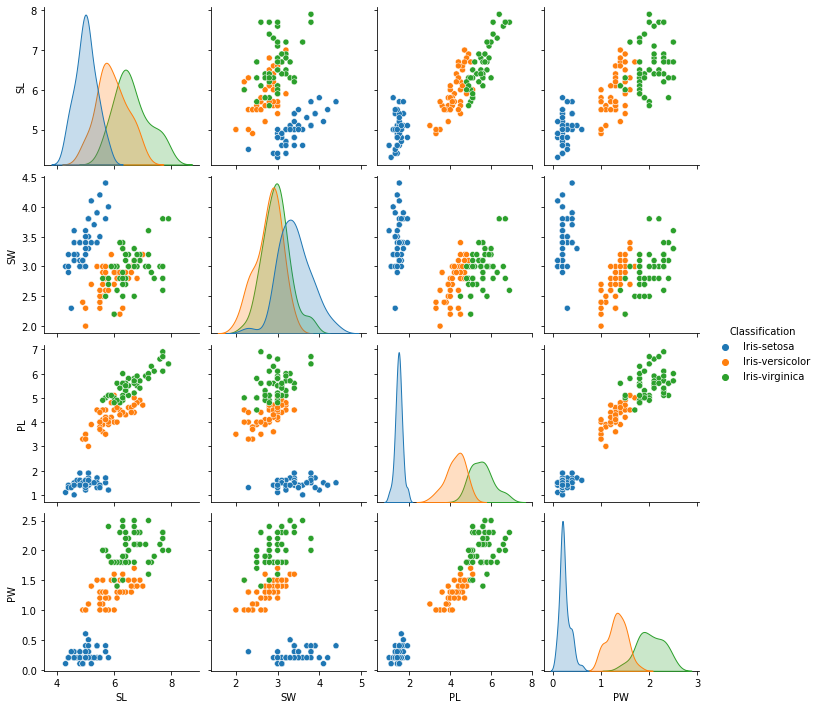

In [5]:
sns.pairplot(df,hue='Classification')

From the above plots we can see that iris-setosa can be clearly distinguished from remaining two based on SL,SW,PL and PW whereas iris-versicolor and iris-virginica have overlapping regions

# Checking outliers using boxplot

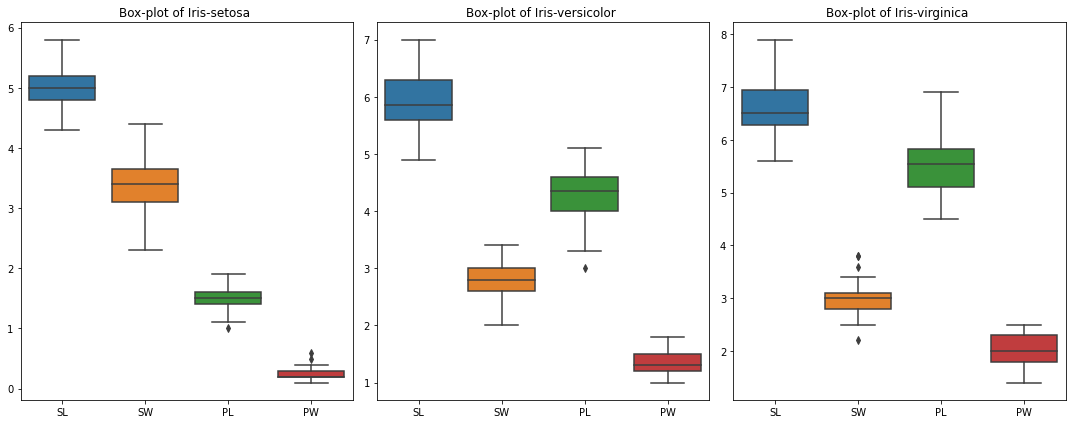

In [6]:
df_is=df[df['Classification']=='Iris-setosa']
df_ve=df[df['Classification']=='Iris-versicolor']
df_vi=df[df['Classification']=='Iris-virginica']
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
ax=sns.boxplot(data=df_is, linewidth=1.5)
plt.title("Box-plot of Iris-setosa ",fontsize=12)

plt.subplot(1,3,2)
ax=sns.boxplot(data=df_ve, linewidth=1.5)
plt.title("Box-plot of Iris-versicolor ",fontsize=12)

plt.subplot(1,3,3)
ax=sns.boxplot(data=df_vi, linewidth=1.5)
plt.title("Box-plot of Iris-virginica ",fontsize=12)
plt.tight_layout()

In [7]:
pd.pandas.set_option('display.max_columns',None)
dk=df.groupby(['Classification']).describe()
dk #statistical values per classification

SL                                                     SW  \
                count      mean       std  min    25%   50%   75%  max count   
Classification                                                                 
Iris-setosa      47.0  5.008511  0.360452  4.3  4.800  5.00  5.20  5.8  47.0   
Iris-versicolor  48.0  5.925000  0.522474  4.9  5.600  5.85  6.30  7.0  48.0   
Iris-virginica   48.0  6.616667  0.598343  5.6  6.275  6.50  6.95  7.9  49.0   

                                                                 PL            \
                     mean       std  min  25%  50%   75%  max count      mean   
Classification                                                                  
Iris-setosa      3.408511  0.390557  2.3  3.1  3.4  3.65  4.4  48.0  1.468750   
Iris-versicolor  2.781250  0.315322  2.0  2.6  2.8  3.00  3.4  48.0  4.252083   
Iris-virginica   2.967347  0.322353  2.2  2.8  3.0  3.10  3.8  48.0  5.547917   

                                                         PW                   \
                      std  min  25%   50%    75%  max count   mean       std   
Classification                                                                 
Iris-setosa      0.175228  1.0  1.4  1.50  1.600  1.9  50.0  0.244  0.107210   
Iris-versicolor  0.475345  3.0  4.0  4.35  4.600  5.1  50.0  1.326  0.197753   
Iris-virginica   0.555433  4.5  5.1  5.55  5.825  6.9  50.0  2.026  0.274650   

                                          
                 min  25%  50%  75%  max  
Classification                            
Iris-setosa      0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   1.4  1.8  2.0  2.3  2.5

In [8]:
df1=df.copy()

# Outlier manipulation using interquartile rule

In [9]:
species=df['Classification'].unique()
colms=['SL', 'SW', 'PL', 'PW']
for i in species:
    for k in colms:
        lq=dk.loc[[i], [(k,'25%')]].values[0][0]
        hq=dk.loc[[i], [(k,'75%')]].values[0][0]
        med=dk.loc[[i], [(k,'50%')]].values[0][0]
        iqr=round(hq-lq,2)
        df[k].mask(((df['Classification']==i) & ((df[k]<(lq-1.5*iqr))|(df[k])>(hq+1.5*iqr))), med, inplace=True)

In [10]:
pd.pandas.set_option('display.max_columns',None)
dk=df.groupby(['Classification']).describe()
dk

SL                                                     SW  \
                count      mean       std  min    25%   50%   75%  max count   
Classification                                                                 
Iris-setosa      47.0  5.008511  0.360452  4.3  4.800  5.00  5.20  5.8  47.0   
Iris-versicolor  48.0  5.925000  0.522474  4.9  5.600  5.85  6.30  7.0  48.0   
Iris-virginica   48.0  6.616667  0.598343  5.6  6.275  6.50  6.95  7.9  49.0   

                                                                 PL            \
                     mean       std  min  25%  50%   75%  max count      mean   
Classification                                                                  
Iris-setosa      3.408511  0.390557  2.3  3.1  3.4  3.65  4.4  48.0  1.468750   
Iris-versicolor  2.781250  0.315322  2.0  2.6  2.8  3.00  3.4  48.0  4.252083   
Iris-virginica   2.967347  0.322353  2.2  2.8  3.0  3.10  3.8  48.0  5.547917   

                                                         PW         \
                      std  min  25%   50%    75%  max count   mean   
Classification                                                       
Iris-setosa      0.175228  1.0  1.4  1.50  1.600  1.9  50.0  0.200   
Iris-versicolor  0.475345  3.0  4.0  4.35  4.600  5.1  50.0  1.326   
Iris-virginica   0.555433  4.5  5.1  5.55  5.825  6.9  50.0  2.026   

                                                        
                          std  min  25%  50%  75%  max  
Classification                                          
Iris-setosa      8.411210e-17  0.2  0.2  0.2  0.2  0.2  
Iris-versicolor  1.977527e-01  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.746501e-01  1.4  1.8  2.0  2.3  2.5

# Checking for missing values

In [11]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Filling of missing values based on the mean of corresponding class

In [12]:
for i in species:
    for k in colms:
        mean=dk.loc[[i], [(k,'mean')]].values[0][0]
        df[k].mask(((df['Classification']==i) & (df[k].isna())), round(mean,2), inplace=True)

In [13]:
# checking if the missing values are filled
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

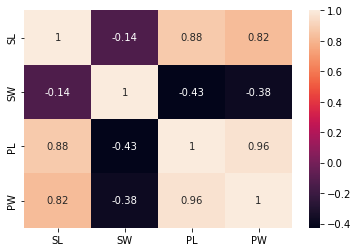

In [14]:
#checking the correlation matrix between features
sns.heatmap(df.corr(),annot=True)

There is high correlation between PL and PW

In [15]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [16]:
# encoding target column Classification
df['Classification']=df['Classification'].map({'Iris-setosa':2,'Iris-versicolor':1,'Iris-virginica':0}) #target value encoding

In [17]:
df.head()

,SL,SW,PL,PW,Classification
0,5.10,3.5,1.4,0.2,2
1,4.90,3.0,1.4,0.2,2
2,5.01,3.2,1.3,0.2,2
3,4.60,3.1,1.5,0.2,2
4,5.00,3.6,1.4,0.2,2


# Setting features and target

In [18]:
#Setting the feature X
X=df.drop(['Classification'],axis=1)
#Setting target y
y=df['Classification']

In [19]:
X.head()

,SL,SW,PL,PW
0,5.10,3.5,1.4,0.2
1,4.90,3.0,1.4,0.2
2,5.01,3.2,1.3,0.2
3,4.60,3.1,1.5,0.2
4,5.00,3.6,1.4,0.2


In [20]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Classification, dtype: int64

# Train test splitting

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.3,stratify = y) #30% data is for testing

In [22]:
#checking if test data and train data has equal representation from all target classes
print(y_test.value_counts())
print(y_train.value_counts())

2    15
1    15
0    15
Name: Classification, dtype: int64
1    35
0    35
2    35
Name: Classification, dtype: int64


# KNN Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
classifier= KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)
print("F1_score :",f1_score(y_test,prediction,average=None))
print("Accuracy score :",accuracy_score(y_test,prediction))
print("Confusion_matrix :",confusion_matrix(y_test,prediction))

F1_score : [1. 1. 1.]
Accuracy score : 1.0
Confusion_matrix : [[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


As per KNN model we have 100% accuracy and zero misclassifications

# Linear SVM

In [24]:
from sklearn.svm import SVC
svm_linear=SVC(kernel="linear")
svm_linear.fit(X_train,y_train) 
prediction=svm_linear.predict(X_test)
print("F1_score :",f1_score(y_test,prediction,average=None))
print("Accuracy score :",accuracy_score(y_test,prediction))
print("Confusion_matrix :",confusion_matrix(y_test,prediction))

F1_score : [0.96551724 0.96774194 1.        ]
Accuracy score : 0.9777777777777777
Confusion_matrix : [[14  1  0]
 [ 0 15  0]
 [ 0  0 15]]


As per Linear SVM model we have 97.7% accuracy and 1 misclassification

# Polynomial SVM

In [25]:
svm_poly=SVC(kernel='poly',degree=2)
svm_poly.fit(X_train,y_train)
prediction=svm_poly.predict(X_test)
print("F1_score :",f1_score(y_test,prediction,average=None))
print("Accuracy score :",accuracy_score(y_test,prediction))
print("Confusion_matrix :",confusion_matrix(y_test,prediction))

F1_score : [0.96551724 0.96774194 1.        ]
Accuracy score : 0.9777777777777777
Confusion_matrix : [[14  1  0]
 [ 0 15  0]
 [ 0  0 15]]


As per Polynomial SVM model we have 97.7% accuracy and 1 misclassification

# Radial Basis Function SVM

In [26]:
svm_rad=SVC(kernel='rbf')
svm_rad.fit(X_train,y_train)
prediction=svm_rad.predict(X_test)
print("F1_score :",f1_score(y_test,prediction,average=None))
print("Accuracy score :",accuracy_score(y_test,prediction))
print("Confusion_matrix :",confusion_matrix(y_test,prediction))

F1_score : [0.96774194 0.96551724 1.        ]
Accuracy score : 0.9777777777777777
Confusion_matrix : [[15  0  0]
 [ 1 14  0]
 [ 0  0 15]]


As per RBF SVM model we have 97.7% accuracy and 1 misclassification

# Decision Tree Classifier Model

In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print("F1_score :",f1_score(y_test,prediction,average=None))
print("Accuracy score :",accuracy_score(y_test,prediction))
print("Confusion_matrix :",confusion_matrix(y_test,prediction))

F1_score : [0.93333333 0.93333333 1.        ]
Accuracy score : 0.9555555555555556
Confusion_matrix : [[14  1  0]
 [ 1 14  0]
 [ 0  0 15]]


As per Decision tree model we have 97.7% accuracy and 1 misclassification

# Random Forest Classifier Model

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(bootstrap= True,
 max_depth= 70,
 max_features= 'auto',
 min_samples_leaf= 3,
 min_samples_split= 3,
 n_estimators= 300)
rf.fit(X_train,y_train)
prediction=rf.predict(X_test)
print("F1_score :",f1_score(y_test,prediction,average=None))
print("Accuracy score :",accuracy_score(y_test,prediction))
print("Confusion_matrix :",confusion_matrix(y_test,prediction))

F1_score : [0.96774194 0.96551724 1.        ]
Accuracy score : 0.9777777777777777
Confusion_matrix : [[15  0  0]
 [ 1 14  0]
 [ 0  0 15]]


As per Random Forest Classifier model we have 97.7% accuracy and 1 misclassification

# Best model conclusion

As per the f1_score, accuracy and confusion matrix the KNN model is giving the best performance, hence KNN Model is best suited for predicting the species based on the iris dataset